In [ ]:
#вирішити завдання класифікації зображень їжі для 3 класів з набору даних food101
#i1=4, i2=34, i3=64
import zipfile
# Download zip file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 
zip_ref = zipfile.ZipFile('101_food_classes_10_percent.zip', 'r')
zip_ref.extractall()
zip_ref.close()


['beef_tartare', 'eggs_benedict', 'miso_soup']
Image shape: (512, 288, 3)


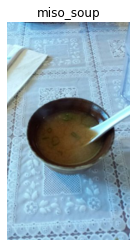

In [6]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

data_dir = pathlib.Path("101_food_classes_10_percent/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
class1= [class_names[4], class_names[34], class_names[64]]
print(class1)
#image
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") 
  return img
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="miso_soup")

In [26]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/train/"
train_data = train_datagen.flow_from_directory(train_dir,batch_size=32, target_size=(224, 224), class_mode= 'categorical')
valid_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224),class_mode= 'categorical')
#Створеняя навчального екземпляру ImageDataGenerator із розширенням даних
train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range = 20, width_shift_range = 0.2,height_shift_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data_augmented = train_datagen_augmented.flow_from_directory(test_dir, target_size = (224, 224), batch_size = 32, class_mode = 'categorical')
for i in class_names:
  if i not in class1:
    dirpath = Path(train_dir) / i
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)
    dirpath = Path(test_dir) / i
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)
#Створення моделі
mymodel = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation="relu",input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax") 
])
mymodel.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history = mymodel.fit(train_data_augmented, epochs = 5, steps_per_epoch = len(train_data_augmented),
                    validation_data = valid_data, 
                    validation_steps = len(valid_data))


Found 225 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Epoch 1/5
8/8 [==============================] - 14s 1s/step - loss: 1.3225 - accuracy: 0.3333 - val_loss: 1.1420 - val_accuracy: 0.3467
Epoch 2/5
8/8 [==============================] - 12s 1s/step - loss: 1.1150 - accuracy: 0.3467 - val_loss: 1.0811 - val_accuracy: 0.4267
Epoch 3/5
8/8 [==============================] - 12s 1s/step - loss: 1.0698 - accuracy: 0.4178 - val_loss: 1.0156 - val_accuracy: 0.5200
Epoch 4/5
8/8 [==============================] - 12s 1s/step - loss: 1.0406 - accuracy: 0.4133 - val_loss: 0.9682 - val_accuracy: 0.5200
Epoch 5/5
8/8 [==============================] - 19s 2s/step - loss: 0.9876 - accuracy: 0.4933 - val_loss: 0.9107 - val_accuracy: 0.5867


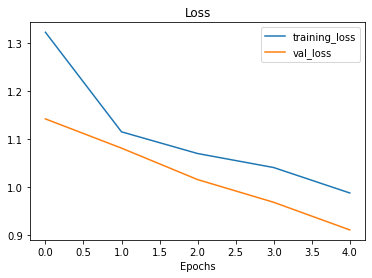

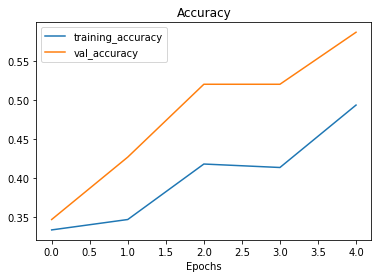

In [27]:
#Щоб додатково перевірити ефективність навчання моделі, створюються два графіки: криві точності та криві втрат
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history)

In [30]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [29]:
#Прогноз
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(mymodel, "miso_soup.jpeg" , class1)